# <font color= 'blue'> Poisson Image Editing</font>

## Seamless Image Cloning using openCV

#### A notebook by *Dhruv Ilesh Shah*

***Packages Used: *** Python 2.7, openCV 3.1.0, `gimp 2.8` (recommended)

This notebook demonstrates how the Poisson Solver can be used to seamlessly clone an image(or a portion) onto another.
We begin by importing required packages.

In [2]:
%matplotlib inline 

import cv2
import numpy as np
import matplotlib.pyplot as plt

For applying the algorithm, you will need the cloned image and a mask that identifies the cloned portion of the image. The purpose of the mask will clear in the subsequent steps.  
***How to obtain the mask?*** *This method needs improvement - suggestions welcome!*
* Given that you clone the image on your system, I recommend you use `gimp` for the purpose. Open `GIMP Image Editor`.
* Open the image on which cloning must occur, the destination image.
* In another window, open the source, whose portion is to be cloned. Using the select tool, select and copy the portion.
* Paste the portion on the destination image. You will see that a new layer with the pasted portion will be created. Using the `Transform` tool, move the portion to desired location and scale accordingly, using the `Scale` tool.
* Export this image and save your cloned file as a `jpeg` or `png` file. Now we must make the mask.
* Create a new `background layer` and place it below the pasted layer. Also, hide the destination image layer. Select the bg-layer and color it black using the Color Tool.
* You will now have the cloned portion on a black background. Using the Thresholding tool (or on `cv2`), threshold all pixels above 1 as 255.(*This should work unless your image has a pixel value 0, in which case you may have to use floodFill or explicitly modify the mask file*).
* Export this file as the mask image in the `jpeg` or `png` format.

Let's now begin with the algorithm implementation.

In [3]:
im_cloned = cv2.imread("stinkbug_cloned.png",  cv2.IMREAD_GRAYSCALE)
im_mask = cv2.imread("stinkbug_cloned_mask.png", cv2.IMREAD_GRAYSCALE)
it = 300; # Set number of iterations

After importing the image and mask, we create a temporary image to store the current value of pixels as the new ones are being calculated. This is because we want to simultaneously update values. * The iterative method used is called the ** Jacobi's Method. ** *

In [4]:
im_temp = im_cloned.copy()
im_seamless = im_temp.copy()
sigma = []
for i in range(im_cloned.shape[0]):
        for j in range(im_cloned.shape[1]):
            if (im_mask[i,j]==255):
                sigma.append([i,j])

for a in range(it):
    for [i,j] in sigma:
        term = 10000
        term = term + im_seamless[i+1, j]+im_seamless[i-1, j]+im_seamless[i, j-1]+im_seamless[i, j+1]
        if(im_mask[i-1, j]==255):
            term = term + im_cloned[i,j]-im_cloned[i-1,j]
        if(im_mask[i+1, j]==255):
            term = term + im_cloned[i,j]-im_cloned[i+1,j]
        if(im_mask[i, j+1]==255):
            term = term + im_cloned[i,j]-im_cloned[i,j+1]
        if(im_mask[i, j-1]==255):
            term = term + im_cloned[i,j]-im_cloned[i,j-1]
        im_temp[i,j] = (term-10000)/4
    im_seamless = im_temp.copy()
    print a

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

As is visible from the code, we scan the whole cloned image for points where the corresponding value of the mask is 255 (*white*), and update `im_temp` as suggested in the algorithm. The gradient for the source image is defined as zero at the boundary points.
*Note that the pixel values in cv2 are of `ubyte_scalar` type and hence don't support addition due to overflow. `10000` is a random large number that helps maintain the variable `term` as a normal integer and hence allow addition without overflow*

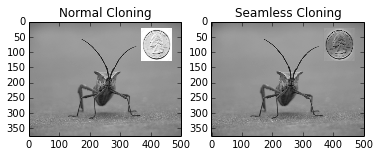

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im_cloned,cmap = 'gray')
ax[0].set_title('Normal Cloning')
ax[1].imshow(im_seamless, cmap='gray')
ax[1].set_title('Seamless Cloning')

#### Thank You!